In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
sra_run = pd.read_csv('../SraRunInfo.csv')
sra_map = sra_run[['Run', 'SampleName']]

In [3]:
# transrate scores
file_ncgr_transrate_scores = "../assembly_evaluation_data/transrate_imicrobe_scores.csv"
file_dib_transrate_scores = "../assembly_evaluation_data/transrate_scores_trinity-2.2.0.csv"

In [4]:
ncgr_transrate = pd.read_csv(file_ncgr_transrate_scores)
#ncgr_transrate = pd.merge(sra_map,ncgr_transrate,on="SampleName")

dib_transrate = pd.read_csv(file_dib_transrate_scores)
#dib_transrate = pd.merge(sra_map,dib_transrate,on="Run")

In [5]:
dib_transrate.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff,SampleName
0,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,100847,201,14341,55390309,549.25093,0,12194,2,28587,...,2912,0.02888,67843,0.67273,6881,0.06823,0.19251,0.32002,0.43046,MMETSP1102
1,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,32717,201,9345,31700139,968.91949,0,11513,0,18908,...,1741,0.05321,16408,0.50151,1526,0.04664,0.33582,0.45389,0.33274,MMETSP1416
2,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,35078,201,16541,25939483,739.48010,0,7331,21,17132,...,1447,0.04125,19702,0.56166,1888,0.05382,0.31668,0.49989,0.52635,MMETSP0883
3,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,35570,201,19515,33760198,949.11999,0,12195,22,20101,...,2113,0.05940,14632,0.41136,1863,0.05238,0.38950,0.59841,0.49616,MMETSP0042
4,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,38153,201,2759,14903245,390.61791,0,993,0,6629,...,789,0.02068,14557,0.38154,6954,0.18227,0.12455,0.20092,0.23493,MMETSP0380


In [6]:
ncgr_transrate.head()

,assembly,SampleName,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,...,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
0,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,MMETSP0909,17793,150,5295,13335459,726.32406,2371,4918,0,...,0.62997,73,0.00410,2864,0.16096,5822,0.32721,0.08002,0.08486,0.02586
1,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,MMETSP1138,21907,150,13716,22494042,1016.92728,1248,8959,4,...,0.75834,3558,0.16241,11314,0.51646,621,0.02835,0.15532,0.29205,0.46644
2,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,MMETSP0317,10424,150,14124,12824577,1225.50691,287,5182,5,...,0.68314,1624,0.15579,4927,0.47266,142,0.01362,0.29773,0.48681,0.45753
3,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,MMETSP0370,54971,150,7545,41366781,725.22565,8621,15861,0,...,0.67985,291,0.00529,21782,0.39625,2127,0.03869,0.17398,0.24414,0.41163
4,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,MMETSP1412,14977,150,11460,19276146,1275.26300,1015,7611,2,...,0.66075,43,0.00287,3505,0.23403,1752,0.11698,0.22650,0.25427,0.32807


In [7]:
dib_transrate = dib_transrate.drop_duplicates()
ncgr_transrate = ncgr_transrate.drop_duplicates()

In [11]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#566573', color2='#F5B041', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    newdf = pd.DataFrame()
    df1 = df1.sort_values(['SampleName'])
    df2 = df2.sort_values(['SampleName'])
    newdf[df1name] = df1[column]
    newdf[df2name] = df2[column]
    newdf['SampleName.DIB'] = df2['SampleName']
    newdf['SampleName.NCGR'] = df1['SampleName']
    newdf = newdf.dropna()
    newdf = newdf.drop_duplicates()
    # plot with different colors if df1 > or < then df2
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
#     ax.set_ylabel(column, fontsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#566573', color1='#F5B041', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax

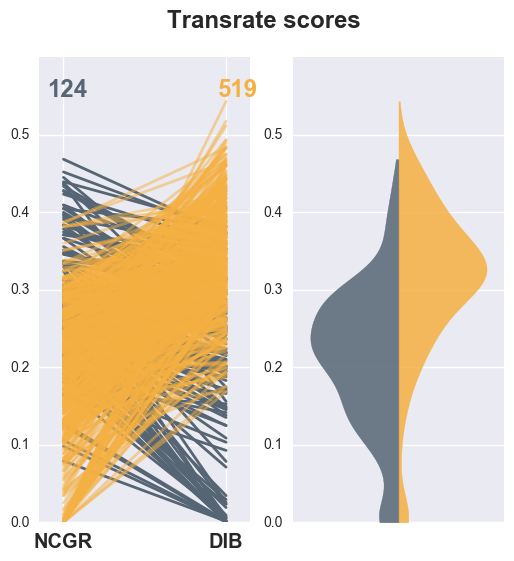

In [12]:
score,fig, ax = create_plots(ncgr_transrate,dib_transrate, 'score', 'Transrate scores',ymax=.6, ypos=0.55)

In [13]:
score.loc[score.DIB < 0.15]

,NCGR,DIB,SampleName.DIB,SampleName.NCGR
505,0.20435,0.12519,MMETSP0121,MMETSP0058
236,0.21420,0.00002,MMETSP1412,MMETSP0059
7,0.12814,0.00142,MMETSP0924,MMETSP0092
347,0.28109,0.14732,MMETSP0378,MMETSP0096
135,0.24866,0.03437,MMETSP0932,MMETSP0174
285,0.20401,0.02947,MMETSP0347,MMETSP0271
327,0.21399,0.00917,MMETSP0912,MMETSP0369
76,0.17233,0.00623,MMETSP0044,MMETSP0371
124,0.10573,0.00122,MMETSP1148,MMETSP0492
319,0.25328,0.10862,MMETSP0011,MMETSP0593
